# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Javier Urrutia S
- Nombre de alumno 2: Manuel Zamorano


### **Link de repositorio de GitHub:** `https://github.com/JUrrutia10/Laboratorios-MDS`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

 1.- Apache Spark es un potente motor unificado, diseñado para el procesamiento de datos a gran escala, tanto en centros de datos físicos como en entornos de nube. Entre los problemas con Pandas se encuentran:
*  Al manejar grandes conjuntos de datos el consumo excesivo de memoria puede ser un problema (pues emplea una evaluación ansiosa, que, combinada con la inferencia automática de tipos de datos y el uso de objetos de Python, puede resultar en una gestión ineficiente de la memoria).
*  Su desempeño puede verse comprometido al trabajar con volúmenes de datos más grandes dada, en parte, a su dependencia de NumPy, el cual no está optimizado para operar con grandes cantidades de datos ni para ejecutar operaciones de forma paralela o distribuida.
*  No está diseñado para soportar computación paralela o distribuida.

En cambio, Apache Spark tiene las siguientes ventajas:
*   Es más veloz al aprovechar los avances en hardware para maximizar el uso de recursos, y también por construcción de cálculos que optimizan y programan las tareas para una ejecución paralela eficiente.
*   Permite la separación entre cómputo y almacenamiento, lo que habilita la lectura de diversos tipos de datos para su procesamiento en memoria.
*  Es compatible con múltiples lenguajes de programación, proporcionando una amplia gama de módulos para el manejo de datos y aprendizaje automático, facilitando su integración y uso en diversos contextos.

2.- Resilient Distributed Dataset (RDD) es una estructura de datos que simplifica la manipulación de información tabular de forma inmutable. Este modelo permite que Spark realice operaciones de computación en paralelo de manera eficiente, distribuyendo los datos a través del clúster y ejecutando operaciones en paralelo.

Una de sus principales características son las particiones. Los RDDs están divididos en estas, y son las unidades básicas de paralelismo en Spark. Cada partición de un RDD se procesa de manera independiente, lo que permite la ejecución eficiente de operaciones en paralelo. Las particiones pueden estar distribuidas en los nodos del clúster y se pueden acceder y manipular de forma independiente.

La relación entre RDDs y DataFrames radica en que los DataFrames se construyen sobre los RDDs subyacentes. En otras palabras, los DataFrames son una forma más conveniente de trabajar con datos estructurados que se basa en los principios y la funcionalidad proporcionada por los RDDs. Esto permite que Spark aproveche las optimizaciones y la tolerancia a fallos de los RDDs mientras proporciona una API más amigable para el usuario en la forma de DataFrames.

 3.- Las transformaciones en Spark son operaciones que generan un nuevo RDD a partir de uno existente. Sin embargo, los RDDs son inmutables, por lo que no se modifican directamente; en cambio, se crea un nuevo RDD con los resultados de la transformación. Las transformaciones son perezosas (lazy), lo que significa que no se ejecutan de inmediato, sino que se almacenan en un grafo dirigido acíclico (DAG) para su ejecución posterior. Ejemplos de transformaciones incluyen map, filter, flatMap, reduceByKey, join, entre otros. \\
Por otra parte, las acciones, son operaciones que desencadenan la ejecución de las transformaciones y devuelven un resultado al programa principal o los almacenan en un sistema de almacenamiento externo. Cuando se ejecuta una acción, Spark evalúa todas las transformaciones que se han definido previamente en el grafo DAG y realiza los cálculos necesarios para obtener el resultado final. Ejemplos de acciones incluyen collect, count, take, reduce, saveAsTextFile, entre otros.

4.- El particionamiento es importante por varias razones:

* Al dividir los datos en particiones y distribuirlas entre los nodos del clúster, Spark puede realizar operaciones en paralelo en cada partición. Esto significa que múltiples tareas pueden ejecutarse simultáneamente en diferentes nodos, lo que aprovecha al máximo los recursos disponibles y acelera el procesamiento de datos.

* Permite distribuir uniformemente la carga de trabajo entre los nodos del clúster. Si los datos se distribuyen de manera desigual entre las particiones, algunos nodos pueden terminar con una carga de trabajo desproporcionadamente alta, lo que puede ralentizar el procesamiento. Un particionamiento adecuado garantiza que cada nodo maneje una cantidad similar de datos, lo que mejora el rendimiento general del sistema.

* Al organizar los datos en particiones, Spark puede minimizar la cantidad de comunicación necesaria entre los nodos del clúster durante el procesamiento. Esto se debe a que las operaciones que implican datos en la misma partición pueden realizarse localmente en un nodo sin necesidad de transferir datos entre nodos, lo que reduce la sobrecarga de red y mejora la eficiencia.

* Puede optimizar el uso de la memoria y el almacenamiento en el clúster. Por ejemplo, al particionar los datos de manera que se ajusten a la memoria disponible en cada nodo, se puede minimizar el uso de memoria virtual y la necesidad de operaciones costosas de lectura y escritura en disco.

5.- Spark Driver es responsable de coordinar todo el proceso de ejecución de la aplicación Spark, contiene el programa principal de la aplicación Spark y ejecuta el código del usuario, interactúa con el administrador de clúster para obtener recursos y asignar tareas a los ejecutores y gestiona el estado global de la aplicación Spark, incluidos los RDDs, los DataFrames y otros elementos de la lógica de la aplicación.

Por otro lado Spark Executor son procesos que se ejecutan en los nodos del clúster y realizan el trabajo real de procesamiento de datos. Son responsables de ejecutar tareas individuales y mantener los datos en memoria o en disco según sea necesario, comunicándose con el Spark Driver y ejecutando las tareas asignadas por él. Además, administran el ciclo de vida de los RDDs y otros datos en memoria caché o almacenados temporalmente durante la ejecución de la aplicación.

6.- El Catalyst Optimizer es un componente  que se encarga de optimizar consultas SQL y expresiones lógicas en el proceso de ejecución de las operaciones sobre datos estructurados. Su función principal es mejorar el rendimiento de las consultas mediante la aplicación de diversas técnicas de optimización. Algunas de las funciones principales del Catalyst Optimizer son:

* Optimización de expresiones: El Catalyst Optimizer reescribe y reorganiza las expresiones lógicas de las consultas para mejorar la eficiencia en la ejecución. Esto incluye la simplificación de expresiones redundantes, la reubicación de operaciones costosas y la aplicación de reglas de álgebra relacional para optimizar el plan de ejecución.

* Generación de planes de ejecución eficientes: Utilizando información estadística sobre los datos y las operaciones, el Catalyst Optimizer genera planes de ejecución óptimos que minimizan el tiempo de procesamiento y maximizan el uso de recursos del clúster.

* Selección de estrategias de ejecución: El Catalyst Optimizer elige las estrategias de ejecución más adecuadas para cada operación en función de las características de los datos y el hardware disponible. Por ejemplo, puede decidir si es más eficiente realizar un join mediante un shuffle o mediante un broadcast, dependiendo del tamaño de los datos involucrados.

* Optimización de join: El Catalyst Optimizer optimiza las operaciones de join, como la selección del algoritmo de join más eficiente (sort-merge join, hash join, etc.) y la reordenación de tablas para minimizar el movimiento de datos entre nodos.




## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=8338466991937b984ec1a2f3ea07eb6d819d35660d7fb6898ab18ea02bd4c15f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

In [3]:
sparksession = SparkSession.builder.master("local").appName("Lab 4").getOrCreate()

In [4]:
%%capture
!wget https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet

In [5]:
df = (
    sparksession.read
    .option("header",'True')
    .parquet("datos_lab_spark.parquet")

)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [6]:
#1.Utilice .printSchema() para revisar la estructura de los datos
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [7]:
#Muestre las primeras 10 filas del dataset. Hint: utilice .show()
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [8]:
##Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice .sample()

df.sample(fraction=0.05, seed=420).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|                NULL|             16.05|2022-11-04 00:00:00|   credit card|   home & garden|     3.0|        22.0|       West Kevin|     mobile|           NULL|1832 

In [9]:
##Revise los tipos de datos de cada columna con .dtypes() y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?

df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

Tipo no adecuado:

*  'Is An Alien' es una variable binaria que indica si el cliente es un alien o no, por lo que más adecuado sería utilizar un tipo de dato booleano (True o False) o float (0 o 1).

*  En 'Quantity', se trata de una cantidad discreta (número de productos), por lo que el tipo de dato integer sería más apropiado que double.

*  La edad en 'Customer Age' se representa siempre como un número entero, por lo que el tipo de dato integer sería más adecuado que double.

*  En 'Account Age Days' se ve la antigüedad de la cuenta en días en enteros, por lo que el tipo de dato integer sería más adecuado que double nuevamente.

*  Finalemente, ocurre lo mismo con 'Transaction Hour', pues las horas se ven que son sólo números enteros.



In [10]:
#Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
from pyspark.sql.types import StringType, IntegerType, FloatType


def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df


cols_to_cast = {"Quantity": IntegerType(), "Customer Age": IntegerType(), "Account Age Days": IntegerType(), "Transaction Hour": IntegerType(), "Is An Alien": FloatType()}
df_con_casteo = cast_columns(df, cols_to_cast)
df_con_casteo.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: float (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: integer (nullable = true)



También es necesario cambiar los null de Is Fraudulent por 1's y cambiar su nombre a Is An Alien:

In [11]:

df = df.na.fill({'Is An Alien': 1.0})

In [12]:
#Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
from pyspark.sql.functions import when, rand, col, sum

exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|          0|          126886|          126953|
+--------------+-----------+----------------

In [13]:
df.count()

600000

In [14]:
#Elimine datos nulos.
df = df.na.drop(how="any")

In [15]:
df.count()

17033

In [16]:
#Elimine datos duplicados.
df = df.dropDuplicates()

In [17]:
df.count()

17033

In [18]:
# Eliminar filas con el mismo Transaction ID
df = df.dropDuplicates(['Transaction ID'])

In [19]:
df.count()

16798

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [20]:
#Agregar una columna llamada "Transaction bp" con el monto total de la transacción en bodoque pesos.
from pyspark.sql.functions import col, log, abs

df=df.withColumn('Transaction bp', log(48 + abs(df['Transaction Amount']**36)))

In [21]:
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+
|0002948c-f473-4fd...|7ae77fa3-3e4c-479...|            131.79|2021-09-22 00:00:00|        PayPal|    toys & games|     2.0|       

In [22]:
#Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
from pyspark.sql.functions import month

df = df.withColumn("Transaction Month", month(col("Transaction Date")))

In [23]:
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+
|0002948c-f473-4fd...|7ae77fa3-3e4c-479...|            131.79|2021-09-22 00:

In [24]:
#Crear la variable Type of purchase según la catidad de unidades vendidas de acuerdo a las siguientes categorías
from pyspark.sql.functions import when

condicion = when(df["Quantity"] <= 5, "Compra minorista").otherwise("Compra mayorista")
df = df.withColumn("Type of purchase", condicion)

df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|0002948c-f473-4fd...|7ae

In [25]:
#Imprima los registros de compras hechas por alienígenas en el comecio mayorista. Utilice .filter().
compras_alien_mayorista = df.filter((df["Type of purchase"] == "Compra mayorista") & (df["Is An Alien"] == 1.0))

compras_alien_mayorista.show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

In [26]:
#Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice .groupby().
conteo_compras_por_tipo = df.groupby("Is An Alien").count()
conteo_compras_por_tipo = conteo_compras_por_tipo.withColumnRenamed("count", "Cantidad de compras")

conteo_compras_por_tipo.show()

+-----------+-------------------+
|Is An Alien|Cantidad de compras|
+-----------+-------------------+
|        0.0|              12517|
|        1.0|               4281|
+-----------+-------------------+



In [27]:
from pyspark.sql.functions import avg

tabla_recaudacion_promedio = df.groupby("Payment Method", "Is An Alien") \
    .agg(avg(col("Transaction Amount")).alias("Promedio de recaudación por transacción"))

tabla_pivot = tabla_recaudacion_promedio \
    .groupBy("Payment Method") \
    .pivot("Is An Alien") \
    .agg(avg(col("Promedio de recaudación por transacción"))) \
    .na.fill(0)

tabla_pivot.show()

+--------------+------------------+------------------+
|Payment Method|               0.0|               1.0|
+--------------+------------------+------------------+
|    debit card| 215.9200754479721| 293.9991666666672|
| bank transfer|214.62898601398632| 286.5833302151541|
|        PayPal|214.47527814136083|257.47002862595417|
|   credit card| 205.9535609444797| 265.1744589552238|
+--------------+------------------+------------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

1.-

In [28]:
#Conversión del DataFrame a formato pandas
df_pandas = df.toPandas()

In [29]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16798 entries, 0 to 16797
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction ID      16798 non-null  object        
 1   Customer ID         16798 non-null  object        
 2   Transaction Amount  16798 non-null  float64       
 3   Transaction Date    16798 non-null  datetime64[ns]
 4   Payment Method      16798 non-null  object        
 5   Product Category    16798 non-null  object        
 6   Quantity            16798 non-null  float64       
 7   Customer Age        16798 non-null  float64       
 8   Customer Location   16798 non-null  object        
 9   Device Used         16798 non-null  object        
 10  IP Address          16798 non-null  object        
 11  Shipping Address    16798 non-null  object        
 12  Billing Address     16798 non-null  object        
 13  Is An Alien         16798 non-null  float64   

2.-

In [30]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

humanos = df_pandas[df_pandas['Is An Alien'] == 0]
aliens = df_pandas[df_pandas['Is An Alien'] == 1]

categorical = ['Product Category', 'Payment Method', 'Device Used']

fig = make_subplots(rows=1, cols=3, subplot_titles=categorical)

for i, cat in enumerate(categorical, start=1):
    humanos_counts = humanos[cat].value_counts().reset_index(name='Cantidad de transacciones')
    aliens_counts = aliens[cat].value_counts().reset_index(name='Cantidad de transacciones')

    fig.add_trace(go.Bar(x=humanos_counts[cat], y=humanos_counts['Cantidad de transacciones'], name='Humanos', marker_color='blue'),
                  row=1, col=i)
    fig.add_trace(go.Bar(x=aliens_counts[cat], y=aliens_counts['Cantidad de transacciones'], name='Aliens', marker_color='green'),
                  row=1, col=i)

    fig.update_xaxes(title_text=cat, row=1, col=i)
    fig.update_yaxes(title_text='Cantidad de transacciones', row=1, col=i)

fig.update_layout(height=600, title_text="Análisis Univariado de las Variables Categóricas", showlegend=False)
fig.show()


Observaciones de los gráficos: \\


En todos los gráficos se separó los clientes si son humanos en color azul y alien en color verde.


*   Gráfico de categoría de producto: Se puede observar que son 5 categorías, en general las diferentes categorías distribuyen similar, con aproximadamente 3300 clientes por categoría y proporcion 1:3 alien humano respectivamente.
*   Gráfico de medio de pago: Se puede observar que son 4 categorías diferentes, nuevamente tienen un número similar de clientes en todas con aproximadamente 4200 en cada una, en la última categoría es un poco menos que es la de método "Paypal", la proporción en cada una de las categorías entre alien y humanos es similar siendo de 1:3 respectivamente.
*   Gráfico de Dispositivo usado: Se puede observar que son 3 categoría, distribuyen similar en las tres(4600) pero la última que es "Desktop" tiene un poco menos(200 aprox), la proporción entre aliens y humanos es 1:3.



3.-

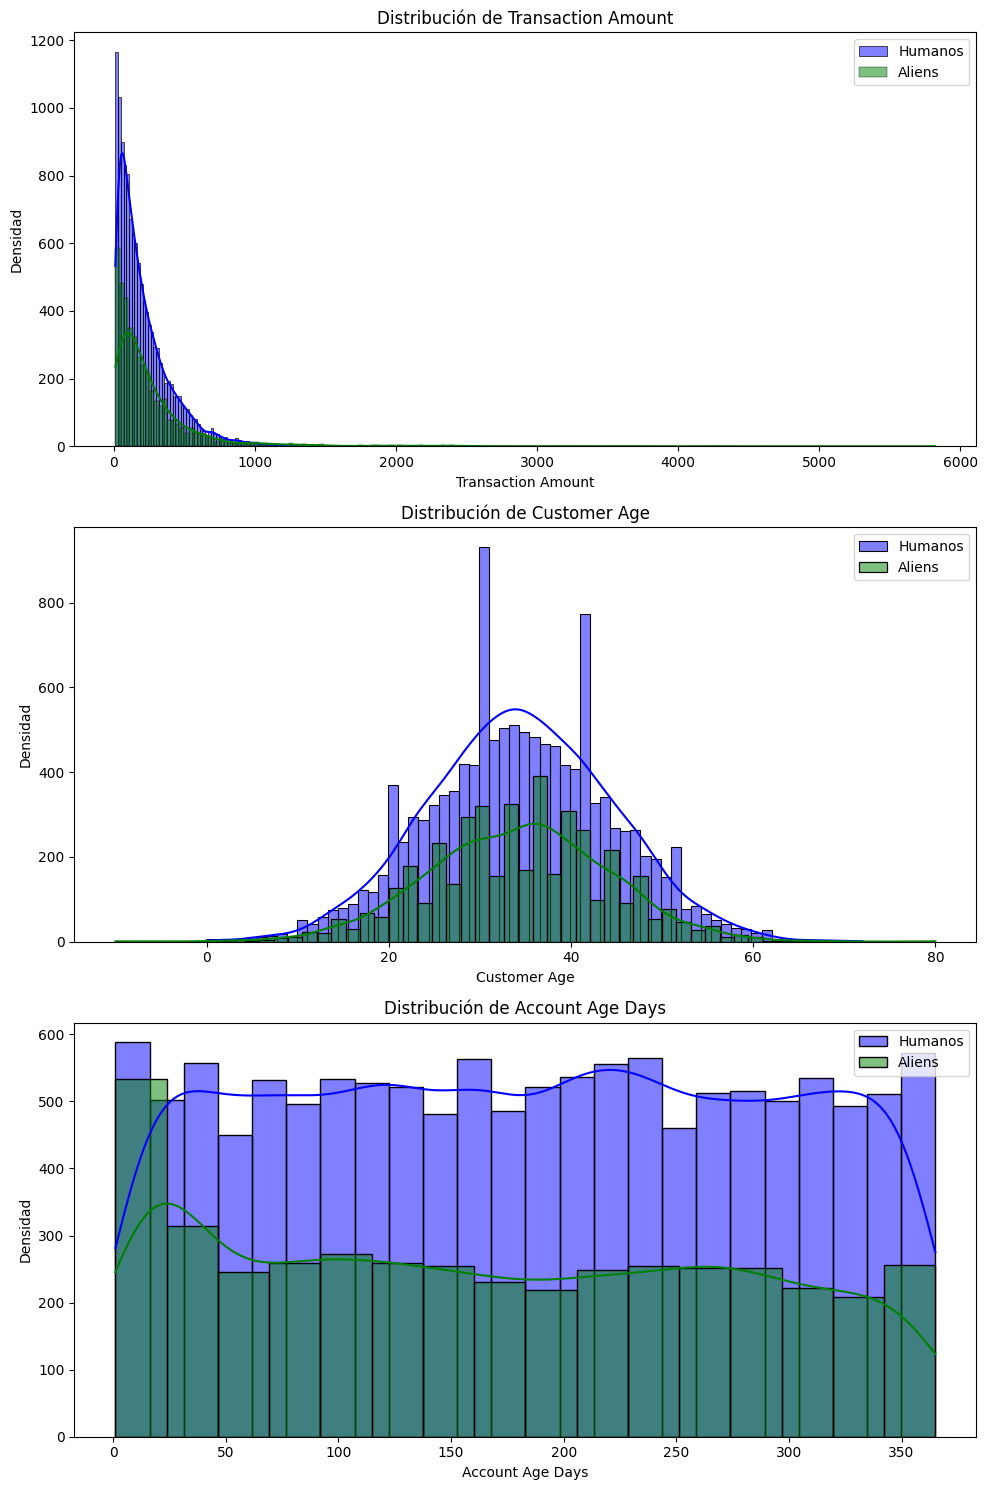

In [31]:
import seaborn as sns

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Transaction Amount
sns.histplot(humanos['Transaction Amount'], kde=True, color='blue', ax=axs[0], label='Humanos')
sns.histplot(aliens['Transaction Amount'], kde=True, color='green', ax=axs[0], label='Aliens')
axs[0].set_title('Distribución de Transaction Amount')
axs[0].set_xlabel('Transaction Amount')
axs[0].set_ylabel('Densidad')
axs[0].legend()

# Customer Age
sns.histplot(humanos['Customer Age'], kde=True, color='blue', ax=axs[1], label='Humanos')
sns.histplot(aliens['Customer Age'], kde=True, color='green', ax=axs[1], label='Aliens')
axs[1].set_title('Distribución de Customer Age')
axs[1].set_xlabel('Customer Age')
axs[1].set_ylabel('Densidad')
axs[1].legend()

# Account Age Days
sns.histplot(humanos['Account Age Days'], kde=True, color='blue', ax=axs[2], label='Humanos')
sns.histplot(aliens['Account Age Days'], kde=True, color='green', ax=axs[2], label='Aliens')
axs[2].set_title('Distribución de Account Age Days')
axs[2].set_xlabel('Account Age Days')
axs[2].set_ylabel('Densidad')
axs[2].legend()


plt.tight_layout()
plt.show()

Nuevamente, para los graficos se separo entre clientes humanos y aliens de color azul y verde respectivamente.


El primer gráfico corresponde a la distribución de monto de compra, se puede notar que par ambos tipos de cliente el máximo es un monto bajo y la cantidad de transacciones va disminuyendo según aumenta el monto


El segundo gráfico muestra la distribución de las edades de los clientes, se puede notar que para los humanos la distribución es similar a una gaussiana con media 35 años, aunque presenta 2 peaks en 30 y 42 años, en cambio para los aliens si bien la curva es similar presenta varios peaks de las edades.


Finalmente el tercer gráfico, muestra la distribución del tiempo de creación de la cuenta de cada cliente, para ambos tipos de cliente la distribución es similar a una uniforme con 500 y 250 clientes por segmento para humanos y aliens respectivamente, aunque para los aliens hay un peak en el primer segmento con más de 500 clientes.


4.-

In [33]:
import plotly.express as px

# Gráfico 1: Lineplot de cantidad de transacciones mensuales por método de pago
grouped_data = df_pandas.groupby(['Transaction Month', 'Payment Method', 'Is An Alien']).size().reset_index(name='Count')

fig1 = px.line(grouped_data, x='Transaction Month', y='Count', color='Payment Method',
               line_group='Is An Alien', markers=True, title='Cantidad de transacciones mensuales por canal de venta',
               labels={'Transaction Month': 'Mes de la transacción', 'Count': 'Cantidad de transacciones', 'Payment Method': 'Canal de venta'},
               category_orders={'Payment Method': df_pandas['Payment Method'].unique()})


# Gráfico 2: Heatmap de cantidad de transacciones por categoría de producto y método de pago
heatmap_data_humanos = df_pandas[df_pandas['Is An Alien'] == 0].groupby(['Payment Method', 'Product Category']).size().reset_index(name='Count')
heatmap_data_aliens = df_pandas[df_pandas['Is An Alien'] == 1].groupby(['Payment Method', 'Product Category']).size().reset_index(name='Count')

fig2 = px.bar(heatmap_data_humanos, x='Payment Method', y='Count', color='Product Category', barmode='group',
              title='Humanos: Cantidad de transacciones por categoría de producto y método de pago',
              labels={'Payment Method': 'Método de pago', 'Count': 'Cantidad de transacciones', 'Product Category': 'Categoría de producto'})
fig2.update_layout(xaxis_title='Método de pago', yaxis_title='Cantidad de transacciones')

fig3 = px.bar(heatmap_data_aliens, x='Payment Method', y='Count', color='Product Category', barmode='group',
              title='Aliens: Cantidad de transacciones por categoría de producto y método de pago',
              labels={'Payment Method': 'Método de pago', 'Count': 'Cantidad de transacciones', 'Product Category': 'Categoría de producto'})
fig3.update_layout(xaxis_title='Método de pago', yaxis_title='Cantidad de transacciones')

# Gráfico 3: Cantidad de transacciones por día de semana y método de pago
grouped_data_amount = df_pandas.groupby(['Transaction Month', 'Payment Method', 'Is An Alien'])['Transaction Amount'].sum().reset_index(name='Total Amount')

# Crear el gráfico de líneas con los datos agrupados
fig4 = px.line(grouped_data_amount, x='Transaction Month', y='Total Amount', color='Payment Method',
               line_group='Is An Alien', markers=True, title='Total de monto por transacciones mensuales por medio de pago',
               labels={'Transaction Month': 'Mes de la transacción', 'Total Amount': 'Total Monto', 'Payment Method': 'Medio de pago'},
               category_orders={'Payment Method': df_pandas['Payment Method'].unique()})

fig1.show()
fig2.show()
fig3.show()
fig4.show()

En estos gráficos se separó entre tipo de clientes por curvas, para el segundo ser se separaron en dos gráficos de barras distintos, el primero mostrando a los humanos y el segundo los aliens.


El primer gráfico muestra la cantidad de transacciones por mes, separado por tipo de cliente y por medio de pago, principalmente se puede observar que par los humanos se obtuvo una cantidad sobre 250 transacciones por mes y tipo de pago, mientra que para los aliens fue cercana a 100, además se pueden notar que no hubo una tendencia de crecimiento o decrecimiento en ninguna de las curvas.


Para el segundo gráfico, se muestra un gráfico de barras de la cantidad de transacciones separado primero por tipo de cliente, luego por medio de pago en grupo de barras y finalmente por categoría de producto en colores. Para los humanos que compran con paypal se ve que son alrededor de 600 por categoría de producto pero teniendo un peak en electrónicos, similarmente con la transferencia bancaria pero esta vez el peak es de salud y belleza, para tarjeta de crédito sigue la tendencia pero el peak es en juegos y juguetes, para tarjeta de débito el peak es en casa y jardín. Para los aliens se tiene cerca de 200 transacciones por subdivisión, aunque vestuario pagando con paypal y transferencia tiene un número menor.


Finalmente el último gráfico muestra el monto total de las transacciones mensuales separado por tipo de cliente y medio de pago, se nota que para los humanos este total en todos los mese se encuentra entre 50k-60k para todos los medios de pago, mientras que para los aliens el rango es 20k-30k, para este último tipo de cliente se pueden ver peaks en el mes de junio, julio y agosto con los medios crédito, débito y transferencia respectivamente, en general no se de un crecimiento o decrecimiento como tendencia, más allá de algunos peak específicos.


### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



1.- Creación de Tabla con PySpark:

In [35]:
# Inicializar sesión de Spark
spark = SparkSession.builder \
    .appName("Crear Tabla en PySpark") \
    .getOrCreate()

# Supongamos que df_pandas es nuestro DataFrame de pandas previamente transformado
# Convertir DataFrame de pandas a DataFrame de Spark
df_spark = spark.createDataFrame(df_pandas)

# Seleccionar una variable específica para la partición de la tabla
# En este ejemplo, utilizaremos "Customer ID" para particionar la tabla
# Justificación: "Customer ID" es una columna comúnmente utilizada para particionar datos en análisis de clientes
# Además, puede ayudar a mejorar el rendimiento de consultas que involucran agrupaciones por cliente
partition_column = "Customer ID"

# Crear tabla en Spark SQL
df_spark.createOrReplaceTempView("tabla_transacciones")

# Mostrar el esquema de la tabla creada
df_spark.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)
 |-- Transaction bp: double (nullable = true)
 |-- Transaction Month: long (nullable = true)
 |-- Type of purchase: string (nullable = true)



2.-Consulta SQL para Principales Clientes:



```
SELECT "Customer ID", SUM(Quantity) AS total_productos_comprados
FROM tabla_transacciones
GROUP BY "Customer ID"
ORDER BY total_productos_comprados DESC
LIMIT 10;
```



In [36]:
sparksession.sql(
    """SELECT  `Customer ID`, SUM(Quantity) AS total_productos_comprados
FROM tabla_transacciones
GROUP BY  `Customer ID`
ORDER BY total_productos_comprados DESC
LIMIT 10"""
).show()

+--------------------+-------------------------+
|         Customer ID|total_productos_comprados|
+--------------------+-------------------------+
|2ceb1e23-16bf-442...|                      5.0|
|cc680d5f-02d9-42f...|                      5.0|
|2f3d5b31-bd85-4d7...|                      5.0|
|ddfbe502-d51c-4ac...|                      5.0|
|aa8c72f5-fbcc-4bf...|                      5.0|
|ddb1eedb-78a7-403...|                      5.0|
|6300f942-b86d-433...|                      5.0|
|2e835dd8-6c9c-4c8...|                      5.0|
|a357c917-cb79-42a...|                      5.0|
|866e29ec-dd8e-4a1...|                      5.0|
+--------------------+-------------------------+



In [37]:
resultado = df_spark.groupBy("Customer ID").agg({"Quantity": "sum"}) \
              .withColumnRenamed("sum(Quantity)", "total_productos_comprados") \
              .orderBy("total_productos_comprados", ascending=False) \
              .limit(10)

resultado.show()

+--------------------+-------------------------+
|         Customer ID|total_productos_comprados|
+--------------------+-------------------------+
|2ceb1e23-16bf-442...|                      5.0|
|cc680d5f-02d9-42f...|                      5.0|
|2f3d5b31-bd85-4d7...|                      5.0|
|ddfbe502-d51c-4ac...|                      5.0|
|aa8c72f5-fbcc-4bf...|                      5.0|
|ddb1eedb-78a7-403...|                      5.0|
|6300f942-b86d-433...|                      5.0|
|2e835dd8-6c9c-4c8...|                      5.0|
|a357c917-cb79-42a...|                      5.0|
|866e29ec-dd8e-4a1...|                      5.0|
+--------------------+-------------------------+



3.- Implementación de Función de Ventana en SQL y Equivalente en Spark:



```
SELECT
    "Customer ID",
    MAX("Transaction Amount") AS max_compra_ultimos_tres_meses
FROM
    (
        SELECT
            *,
            MAX("Transaction Date") OVER (PARTITION BY "Customer ID") AS max_fecha_por_cliente
        FROM
            tabla_transacciones
        WHERE
            "Transaction Date" >= DATE_SUB(CURRENT_DATE(), 90)
    ) subquery
WHERE
    "Transaction Date" = max_fecha_por_cliente
GROUP BY
    "Customer ID";

```



In [38]:
sparksession.sql(
    """SELECT
    `Customer ID`,
    MAX(`Transaction Amount`) AS max_compra_ultimos_tres_meses
FROM
    (
        SELECT
            *,
            MAX(`Transaction Date`) OVER (PARTITION BY `Customer ID`) AS max_fecha_por_cliente
        FROM
            tabla_transacciones
        WHERE
            `Transaction Date` >= DATE_SUB(CURRENT_DATE(), 90)
    ) subquery
WHERE
    `Transaction Date` = max_fecha_por_cliente
GROUP BY
    `Customer ID`"""
).show()

+--------------------+-----------------------------+
|         Customer ID|max_compra_ultimos_tres_meses|
+--------------------+-----------------------------+
|0010bfa7-d3b5-442...|                       130.74|
|004d6df5-5d37-4cd...|                        32.36|
|0061c7c7-ffd9-40d...|                       255.97|
|0084aeb6-6bc7-4f8...|                       265.09|
|00dba4f3-102b-4d8...|                        80.76|
|00dcef31-265c-4d3...|                        82.57|
|00f692ba-f8b4-4d9...|                       235.15|
|011ba8d6-6dcd-4cf...|                       218.64|
|014817a0-2f4f-477...|                       289.72|
|014da57c-a59c-465...|                        33.22|
|015a8996-8ac2-488...|                       451.94|
|01754c8a-c873-49e...|                       267.89|
|0178fe5b-e055-4ec...|                       723.04|
|01ac1427-4acc-410...|                       234.43|
|01feca2f-2907-445...|                        48.71|
|022c33a4-c841-431...|                       1

In [39]:
from pyspark.sql.window import Window
import pyspark.sql.functions as F

# Definir la ventana para los últimos tres meses por cliente
window_spec = Window.partitionBy("Customer ID").orderBy(F.col("Transaction Date").desc()).rangeBetween(Window.unboundedPreceding, Window.currentRow)

# Calcular la compra más alta realizada por cada usuario en los últimos tres meses en Spark
df_spark.withColumn("max_compra_ultimos_tres_meses", F.max("Transaction Amount").over(window_spec)) \
    .filter(F.col("Transaction Date") >= F.date_sub(F.current_date(), 90)) \
    .groupBy("Customer ID") \
    .agg(F.max("max_compra_ultimos_tres_meses").alias("max_compra_ultimos_tres_meses")) \
    .show()

+--------------------+-----------------------------+
|         Customer ID|max_compra_ultimos_tres_meses|
+--------------------+-----------------------------+
|0010bfa7-d3b5-442...|                       130.74|
|004d6df5-5d37-4cd...|                        32.36|
|0061c7c7-ffd9-40d...|                       255.97|
|0084aeb6-6bc7-4f8...|                       265.09|
|00dba4f3-102b-4d8...|                        80.76|
|00dcef31-265c-4d3...|                        82.57|
|00f692ba-f8b4-4d9...|                       235.15|
|011ba8d6-6dcd-4cf...|                       218.64|
|014817a0-2f4f-477...|                       289.72|
|014da57c-a59c-465...|                        33.22|
|015a8996-8ac2-488...|                       451.94|
|01754c8a-c873-49e...|                       267.89|
|0178fe5b-e055-4ec...|                       723.04|
|01ac1427-4acc-410...|                       234.43|
|01feca2f-2907-445...|                        48.71|
|022c33a4-c841-431...|                       1

se realizaron las concultas en ambos formatos para poder comprobar los resultados.

### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

1.-

In [90]:
import requests

url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false"
response = requests.get(url)

with open("object.pkl", "wb") as f:
    f.write(response.content)

2.-

In [91]:
import pickle

with open("object.pkl", "rb") as f:
    obj = pickle.load(f)

print(type(obj))



<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [92]:
print(dir(obj))


['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params',

In [93]:
help(obj)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

Se puede observar que el objeto serializado es una instancia de la clase `LogisticRegression` del módulo `sklearn.linear_model._logistic`. Este objeto es un modelo de regresión logística entrenado, que se puede utilizar para predecir la probabilidad de que un cliente cometa fraude.
Algunos métodos útiles de este objeto incluyen:

* `fit`: para entrenar el modelo.
* `predict`: para predecir las clases de las muestras.
* `predict_proba`: para predecir las probabilidades de clase para las muestras.
* `score`: para calcular la precisión del modelo.

3.-

In [356]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType


def predecir_probabilidad_fraude_ultimo_valor(*cols):
    # Cargar el modelo serializado
      with open("object.pkl", "rb") as f:
          obj = pickle.load(f)

      df = pd.DataFrame([cols]).transpose()
      df.columns = ["Transaction Amount","Quantity","Customer Age","Transaction Hour","Unos"]
      X= df[["Transaction Amount","Quantity","Customer Age","Transaction Hour"]]
      Y=df["Unos"]
      X_train = X.iloc[:, :-1]  # Use iloc for integer-based indexing
      X_test = X.iloc[:, -1]     # Use iloc for integer-based indexing

      Y_train = Y.iloc[:, :-1]  # Use iloc for integer-based indexing
      Y_test = Y.iloc[:, -1]

      obj.fit(X_train, Y_train)

      probabilidad_fraude = obj.predict_proba(X_test)

      return probabilidad_fraude



se crea la funcion para poder entrenar con los datos y obtener la probabilidad del ultimo valor

4.-

In [357]:
# UDF para aplicar la función personalizada a un DataFrame de Spark
fraud_probability_udf = udf(predecir_probabilidad_fraude_ultimo_valor, FloatType())

se agrega a la UDF

5.-

In [358]:
from pyspark.sql.functions import lit
# Seleccionar las columnas relevantes del DataFrame
selected_columns = df_spark[["Transaction Amount","Quantity","Customer Age","Transaction Hour"]]


from pyspark.sql.functions import rand, round

# Generar una columna aleatoria de valores entre 0 y 1 que servira de etiqueta artificial para poder entrenar el modelo
random_column = selected_columns.withColumn("random", rand())
random_a_b_column = random_column.withColumn("Unos", when(random_column["random"] < 0.5, lit(0)).otherwise(lit(1)))
selected_columns = random_a_b_column.drop("random")
selected_columns.show()





+------------------+--------+------------+----------------+----+
|Transaction Amount|Quantity|Customer Age|Transaction Hour|Unos|
+------------------+--------+------------+----------------+----+
|            131.79|     2.0|        39.0|            10.0|   1|
|            243.12|     3.0|        37.0|            10.0|   1|
|            198.24|     3.0|        39.0|             3.0|   0|
|            159.56|     5.0|        36.0|            14.0|   0|
|            344.53|     1.0|        29.0|            18.0|   0|
|              44.5|     3.0|        34.0|             6.0|   1|
|            295.89|     5.0|        24.0|             7.0|   1|
|             55.65|     4.0|        39.0|            12.0|   0|
|              33.3|     3.0|        20.0|             5.0|   1|
|            388.46|     4.0|        55.0|            17.0|   1|
|            361.76|     3.0|        29.0|            20.0|   0|
|             88.01|     5.0|        26.0|             5.0|   1|
|            308.87|     

es esta parte se define el dataframe con las columnas requeridas y se simula una etiqueta ya que es necesario entrenar el modelo previamente pero para eso se debe incluir una etiqueta o clase.

In [359]:

columnas = ["Transaction Amount","Quantity","Customer Age","Transaction Hour","Unos"]
sparkDF2 = selected_columns.select(fraud_probability_udf(*columnas).alias("proba"))


sparkDF2.show()

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "<ipython-input-356-6f2c6474d74c>", line 13, in predecir_probabilidad_fraude_ultimo_valor
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6003, in __setattr__
    except AttributeError:
  File "pandas/_libs/properties.pyx", line 69, in pandas._libs.properties.AxisProperty.__set__
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 730, in _set_axis
    self._mgr.set_axis(axis, labels)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 225, in set_axis
    self._validate_set_axis(axis, new_labels)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/base.py", line 70, in _validate_set_axis
    raise ValueError(
ValueError: Length mismatch: Expected axis has 1 elements, new values have 5 elements


finalmente se obtiene el valor.

### ¿Qué beneficios podría generar utilizar udf?

*  el beneficio de utilizar una funcion UDF es poder utilizar los recursos en paralelo, para poder aprovechar mejor los recursos y disminuir el tiempo de ejecucion de las funciones.
Esta es realmente la principal ventaja de utilizar pyspark